In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lab4_hmc as hmc

In [2]:
from scipy import stats

In [3]:
### EXAMPLES
def e_func(x, f):
    # Simulating some unknown log-probability
    p0 = -x[0]**2/2
    p1 = -x[1]**2/2 + np.log(2+np.cos(f*x[1]))
    lgp = p0 + p1
    return -lgp

def e_grad(x, f):
    g = np.empty(2)
    g[0] = x[0]
    g[1] = x[1] + f*np.sin(f*x[1]) / (2+np.cos(f*x[1]))
    return g

In [10]:
x = [-11.0, 10.5]
mean = [0, 0]
cov = [[1.0, 0.5], [0.5, 2]]

In [11]:
ans = -stats.multivariate_normal.logpdf(x, mean=mean, cov=cov)

In [12]:
ans

135.7605421032342

In [14]:
def e_func(x):
    return -stats.multivariate_normal.logpdf(x, mean=mean, cov=cov)

def e_grad(x):
    return np.linalg.inv(cov)@(x-mean)

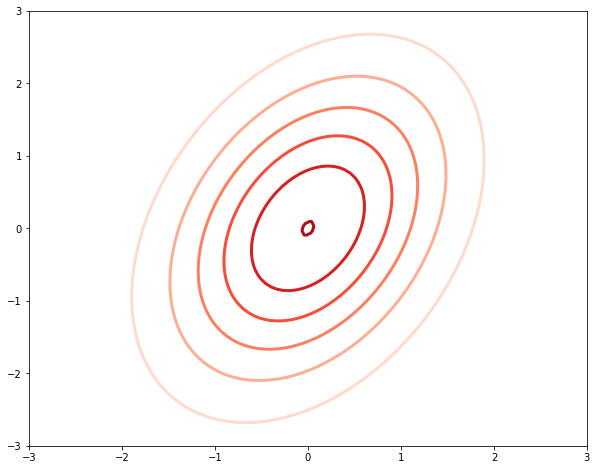

In [15]:
# Plotting parameters
fsz = (10,8)
gsz = 100
lim = 3
#
gx = np.linspace(-lim, lim, gsz)
GX, GY = np.meshgrid(gx, gx)
Gsz = GX.size
G = np.hstack((GX.reshape((Gsz, 1)), GY.reshape((Gsz, 1))))
#
plt.figure(figsize=fsz)
P = np.asarray([np.exp(-e_func(g)) for g in G])
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1);

In [18]:
x0 = np.random.normal(size=2)
hmc.gradient_check(x0, e_func, e_grad)

Calc.         Numeric       Delta         Acc.
     0.42845       0.42845   6.026957e-12  11
    0.138312      0.138312   1.480185e-11  10


Calc.         Numeric       Delta         Acc.
     0.42845       0.42845   6.026957e-12  11
    0.138312      0.138312   1.480185e-11  10
|----------|  0% accepted [ 5 secs to go ]
|#---------| 85% accepted [ 5 secs to go ]
|##--------| 86% accepted [ 4 secs to go ]
|###-------| 86% accepted [ 4 secs to go ]
|####------| 86% accepted [ 3 secs to go ]
|#####-----| 86% accepted [ 2 secs to go ]
|######----| 86% accepted [ 2 secs to go ]
|#######---| 86% accepted [ 1 secs to go ]
|########--| 86% accepted [ 1 secs to go ]
|#########-| 86% accepted [ 0 secs to go ]
|##########| 86% accepted [ 0 secs to go ]
HMC: R=10000 / L=25 / eps=1.2 / Accept=86.4%


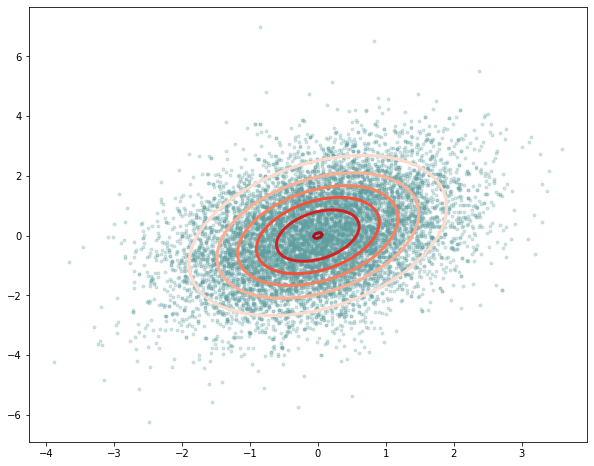

In [25]:
#
np.random.seed(seed=1)  # For reproducibility
R = 10000
burn = int(R/10)
L = 25  # OK here (should be larger in regression sampling)
eps = 1.2  # Trial-and-error ... feel free to experiment!
#
S, *_ = hmc.sample(x0, e_func, e_grad, R, L, eps, burn=burn, checkgrad=True, args=[])
#
plt.figure(figsize=fsz)
plt.plot(S[:, 0], S[:, 1], '.', ms=6, color='CadetBlue', alpha=0.25, zorder=0)
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1);